In [ ]:
!pip install datasets

# Exercise Sheet 10 - Sentiment Analysis


## Learning Objectives
In this lab we are going to:
- Data processing and exploration
- Prediction of finance tweet sentiments

Bullish and bearish are terms used in the stock market to describe investor attitudes.

a. __Bullish:__ A bullish investor believes that the price of one or more securities or indexes will rise

b. __Bearish:__ A bearish investor believes that prices will fall

c. __Neutral:__ Neither bearish or bullish


In [26]:
import nltk
nltk.download('treebank')

nltk.download('stopwords')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Sentiment Classification of finance tweets

Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is bullish, bearish or neutral.

In [27]:
# importing necessary libraries
# import nltk.classify.util
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer, TreebankWordDetokenizer
import string
import pandas as pd
from datasets import load_dataset
import re
import numpy as np
from sklearn.model_selection import train_test_split
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")

In [28]:
labels = {
    0: "bearish",
    1: "bullish",
    2: "neutral"
}
train_dev_df = pd.DataFrame({'text': dataset['train']['text'], 'label': list(map(lambda x:labels[x], dataset['train']['label']))})
test_df = pd.DataFrame({'text': dataset['validation']['text'], 'label': list(map(lambda x:labels[x], dataset['validation']['label']))})

The movie_review dataset was the first to be used for Sentiment Analysis, and is treated as a standard dataset to compare sentiment accuracies. This dataset is therefore included in the NLTK corpora.

# Exercise 1
Complete the function `create_word_fetures` by filtering the tokens to remove punctuations and stopwords.

In [29]:
# We tokenizing, preprocessing and removing punctuations from the text before creating feature vector
punct_list = list(string.punctuation)
english_stopwords = stopwords.words("english")
tokenizer = TreebankWordTokenizer()
detokenizer = TreebankWordDetokenizer()
def create_word_features(sentence):
    url_replaced_text = re.sub(r'https?://[\n\S]+\b', 'u_r_l', sentence)
    words = tokenizer.tokenize(url_replaced_text.lower())

    #YOUR CODE GOES HERE
    useful_words = [word for word in words if word not in english_stopwords and word not in punct_list]
    return detokenizer.detokenize(useful_words)

In [30]:
train_dev_df['text'] = [create_word_features(text) for text in train_dev_df['text'].values]

# Preprocess the test_df in the same way train_dev_df was
test_df['text'] = [create_word_features(text) for text in test_df['text'].values]

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(sentence, wc_name):
  # plot the WordCloud image
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(sentence)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(wc_name)
  plt.tight_layout(pad = 0)

  return plt.show()

In [ ]:
train_dev_df['label'].value_counts()

neutral    6178
bullish    1923
bearish    1442
Name: label, dtype: int64

# Word Cloud

An image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance

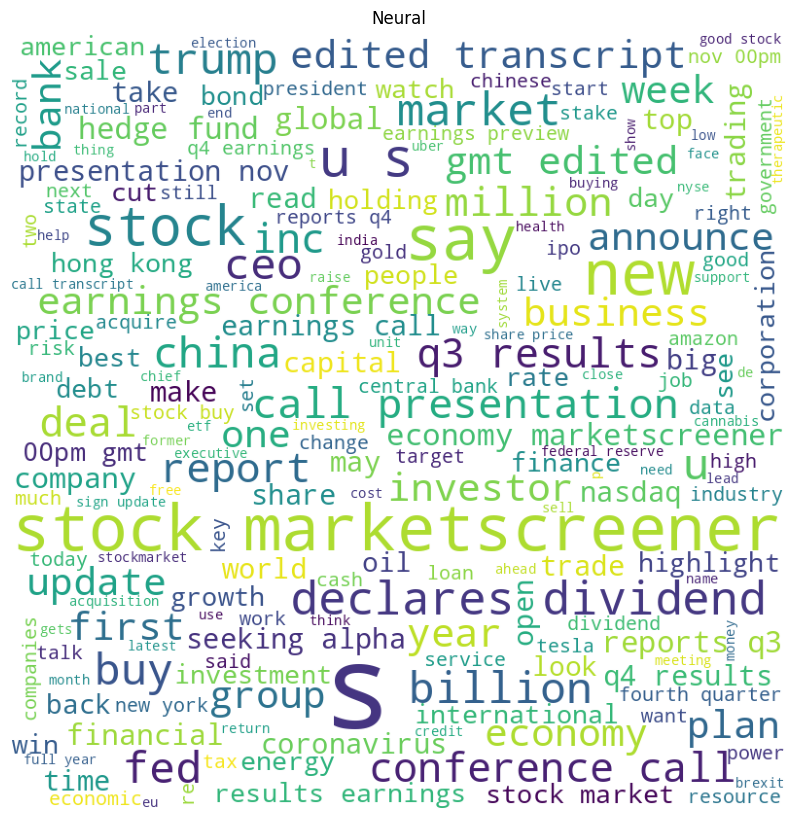

In [33]:
# wordcloud for neutral reviews
text_neutral = train_dev_df[train_dev_df['label']== 'neutral']['text']

# concatenate all sentences into one big sentence and remove all occurance of `u_r_l`
bullish = ' '.join(text_neutral.values.tolist()).replace('u_r_l', '')
plot_wordcloud(bullish, 'Neural')

# Exercise 2
Plot the word cloud diagram for all `bearish` and `bullish` classes.

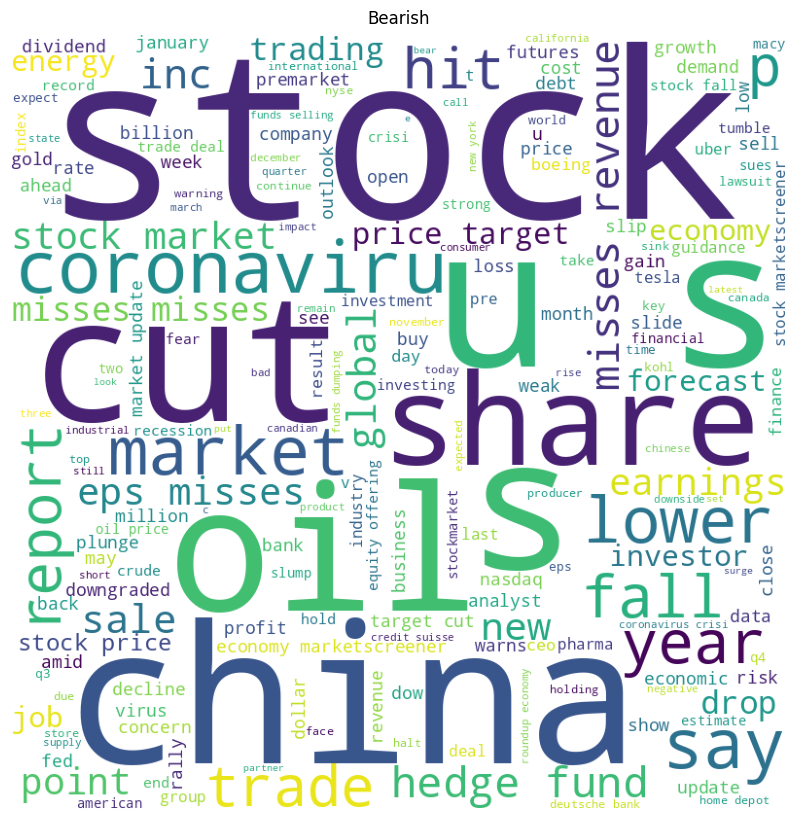

In [35]:
text_bearish = train_dev_df[train_dev_df['label']== 'bearish']['text']
bearish = ' '.join(text_bearish.values.tolist()).replace('u_r_l', '')
plot_wordcloud(bearish, 'Bearish')

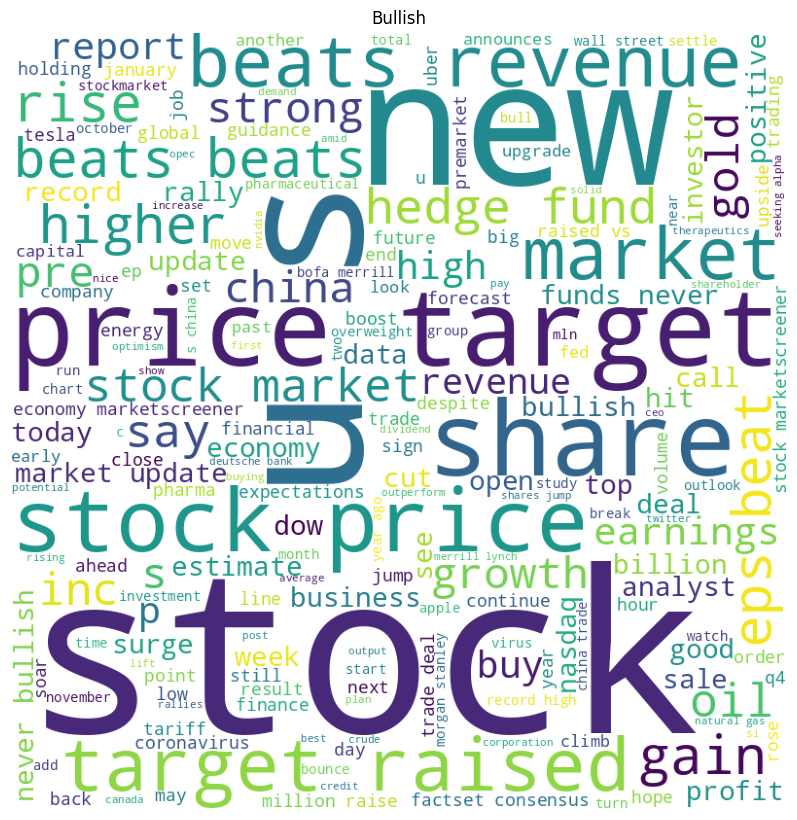

In [38]:
text_bearish = train_dev_df[train_dev_df['label']== 'bullish']['text']
bearish = ' '.join(text_bearish.values.tolist()).replace('u_r_l', '')
plot_wordcloud(bearish, 'Bullish')

# Exercise 3
Split the training dataset into train and validation split.

85%: `Training`, 15%: `Validation`

In [39]:
# Your code goes here
train_X, dev_X, train_y, dev_y = train_test_split(train_dev_df['text'].values, train_dev_df['label'].values, test_size=0.15)

# Sentiment Analysis with ML approaches

Naive Bias Classifier

Naive Bayes is a generative classification model.

A generative model learns parameters by maximizing the joint probability  𝑃(𝑋,𝑌)  through Bayes' rule by learning  𝑃(𝑌)  and  𝑃(𝑋|𝑌)  (where  𝑋  are features and  𝑌  are labels).

Prediction with Naive Bias

$$P\bigg(\frac{label}{features}\bigg) = \frac{P(label) \times P(\frac{features}{label})}{P(features)}$$

Assumption that all features are independant modifies the formula to:

$$P\bigg(\frac{label}{features}\bigg)= \frac{P(label) * P\big(\frac{f1}{label}\big)*...  * P\big(\frac{fn}{label}\big)}{P(features)}$$


Features can be treated in two ways, depending on the classifier being used:

2. Sklearn Classifier:
   - Word Count Vector
   - TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [40]:
## extracting features from text
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_X)
X_test_counts = count_vect.transform(dev_X)


# Training Multinonial NB with BagOfWords features or count vectorizer
NB_classifier_counts = GaussianNB()
NB_classifier_counts.fit(X_train_counts.toarray(), train_y)

# evaluation
preds = NB_classifier_counts.predict(X_test_counts.toarray())
print(classification_report(dev_y, preds))



              precision    recall  f1-score   support

     bearish       0.34      0.52      0.41       228
     bullish       0.45      0.42      0.43       288
     neutral       0.79      0.71      0.75       916

    accuracy                           0.62      1432
   macro avg       0.53      0.55      0.53      1432
weighted avg       0.65      0.62      0.63      1432



# Exercise 4
Extract TF-IDF features for the data, train a Naive Bias model and evaluate the model using the dev dataset

In [ ]:
## Extracting TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Training Multinonial NB with TFIDF features or count vectorizer
NB_classifier_tfidf = GaussianNB()
NB_classifier_tfidf.fit(X_train_tfidf.toarray(), train_y)

preds = NB_classifier_counts.predict(X_test_tfidf.toarray())
print(classification_report(dev_y, preds))


              precision    recall  f1-score   support

     bearish       0.32      0.49      0.39       216
     bullish       0.43      0.42      0.42       286
     neutral       0.77      0.68      0.73       930

    accuracy                           0.60      1432
   macro avg       0.51      0.53      0.51      1432
weighted avg       0.64      0.60      0.62      1432



# USING WORD EMBEDDING [Lecture 3b]
- Using a large corpus to learn word vector representation in an unsupervised manner.
- Using the learnt representation for feature extraction from different text.


In [41]:
!pip install --upgrade gensim

In [42]:
import gensim.downloader as api
print(list(api.info()['models'].keys()))
word2vec = api.load('glove-twitter-100')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [43]:
def encode_word2vec(sentence, agg="sum"):

  """
  agg = sum|mean|min|max

  """
  tokenizer = TreebankWordTokenizer()
  tokenized_words = [tok for tok in tokenizer.tokenize(sentence) if tok in word2vec]
  tokenized_words = ['.'] if len(tokenized_words) ==0 else tokenized_words
  vx = word2vec[tokenized_words]
  if agg=="sum":
    return vx.sum(axis=0)

  if agg=="mean":
    return vx.mean(axis=0)

  if agg == "max":
    max_index = np.argmax(np.linalg.norm(vx, axis=1))
    return vx[max_index]

  if agg == "min":
    min_index = np.argmin(np.linalg.norm(vx, axis=1))
    return vx[min_index]


In [46]:
features_train1 = np.array([encode_word2vec(ax, "mean") for ax in train_X])
features_dev1 = np.array([encode_word2vec(ax, "mean") for ax in dev_X])

# features_all_train = np.array([np.hstack((encode_word2vec(ax), encode_word2vec(ax, 'max'), encode_word2vec(ax, 'min'), encode_word2vec(ax, 'mean'))) for ax in train_X])
# features_all_dev = np.array([np.hstack((encode_word2vec(ax), encode_word2vec(ax, 'max'), encode_word2vec(ax, 'min'), encode_word2vec(ax, 'mean'))) for ax in dev_X])

We obtain features using embedding in the following manner:

1. tokens = tokenizer.tokenize(sentence)

2. Let there be $n$ tokens.

3. Each token/word has $m$ features. e.g
    
    $\text{feat}(t_1) = [x_1, x_2, ... x_m]$ , where $x \in \mathbb{R}$

4. Similarly for $n$ tokens we have a matrix for size $n \times m$. But we ensure that irrespective of the number of words in a sentence, for every sentence the number of features is the same. So one set of features is either min, max, avg, sum over $n$ tokens, resulting in always getting $m$ dimension features for each sentence.

5. We can concatenate features obtained by min, max, mean and sum to get $4 \times m$ size features.

In [45]:
# Training Multinonial NB with BagOfWords features or count vectorizer
NB_classifier_glove = GaussianNB()
NB_classifier_glove.fit(features_train1, train_y)

# evaluation
preds = NB_classifier_glove.predict(features_dev1)
print(classification_report(dev_y, preds))

              precision    recall  f1-score   support

     bearish       0.39      0.51      0.44       228
     bullish       0.40      0.43      0.41       288
     neutral       0.79      0.71      0.75       916

    accuracy                           0.62      1432
   macro avg       0.53      0.55      0.54      1432
weighted avg       0.65      0.62      0.63      1432



# Exercise 5

A naive bayes model has been trained for you using only `mean` of embedding over $n$ tokens. The feature length in the case in $m$. Now obtain features that is concatenation of mean, max, min and sum. Train a naive bayes model with new feature and calcualte metrics.

In [53]:
features_all_train = np.array([np.hstack((encode_word2vec(ax), encode_word2vec(ax, 'max'), encode_word2vec(ax, 'min'), encode_word2vec(ax, 'mean'))) for ax in train_X])
features_all_dev = np.array([np.hstack((encode_word2vec(ax), encode_word2vec(ax, 'max'), encode_word2vec(ax, 'min'), encode_word2vec(ax, 'mean'))) for ax in dev_X])

In [54]:
NB_classifier_glove_all = GaussianNB()
NB_classifier_glove_all.fit(features_all_train, train_y)

# evaluation
preds = NB_classifier_glove_all.predict(features_all_dev)
print(classification_report(dev_y, preds))

              precision    recall  f1-score   support

     bearish       0.38      0.44      0.41       228
     bullish       0.39      0.49      0.43       288
     neutral       0.79      0.70      0.74       916

    accuracy                           0.61      1432
   macro avg       0.52      0.54      0.53      1432
weighted avg       0.65      0.61      0.63      1432



## Exercise [OPTIONAL]
Train a better classifier model like [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
